In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [92]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Attribute Information: (classes: edible=e, poisonous=p)**

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d**

In [21]:
print(df.shape)
df.isnull().mean()

(8124, 23)


class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [93]:
df_dummies = pd.get_dummies(data=df,drop_first=True,)
df_dummies.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


<Axes: xlabel='class', ylabel='count'>

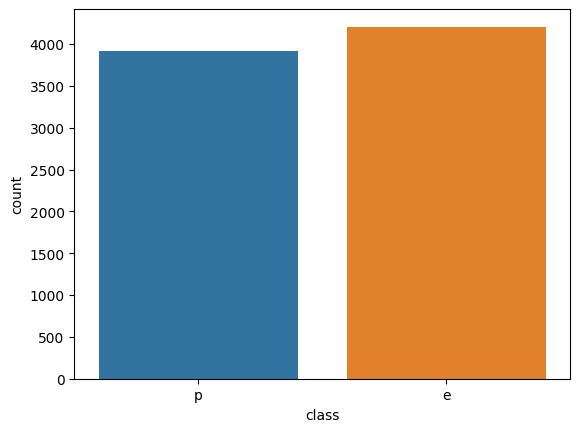

In [19]:
import seaborn as sns

sns.countplot(df,x='class') ## nearly balanced dataset

In [94]:
from sklearn.model_selection import train_test_split

X,y = df_dummies.drop('class_p',axis=1),df_dummies['class_p']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.metrics import classification_report

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=8, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
data_set_r = dict()
models = dict()
count = 1
models_name = [df1,df2,df3,df4,df5,df6]
for ad,mode_name in enumerate(models_name):
    models = dict()
    X,y = mode_name.drop('class',axis=1),mode_name['class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    for i,j in  zip(classifiers,names):
        d = i.fit(X_train, y_train)
        score = d.score(X_test, y_test)
        models[j] = score
    data_set_r[f'df_{ad}'] = models


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686

In [130]:
for i in range(6):
    print(f"df_{i}")
    print(data_set_r[f'df_{i}'].items(),"\n")

df_0
dict_items([('Nearest Neighbors', 0.9970160387914957), ('Linear SVM', 0.9399477806788512), ('RBF SVM', 0.9970160387914957), ('Decision Tree', 0.97911227154047), ('Random Forest', 0.9682954121596419), ('Neural Net', 0.9298769116001492), ('AdaBoost', 0.9981350242446848), ('Naive Bayes', 0.8955613577023499), ('QDA', 0.9884371503170459)]) 

df_1
dict_items([('Nearest Neighbors', 1.0), ('Linear SVM', 0.9399477806788512), ('RBF SVM', 1.0), ('Decision Tree', 0.979485266691533), ('Random Forest', 0.9779932860872809), ('Neural Net', 0.9343528534129056), ('AdaBoost', 0.9921671018276762), ('Naive Bayes', 0.8903394255874674), ('QDA', 0.9802312569936591)]) 

df_2
dict_items([('Nearest Neighbors', 0.9962700484893696), ('Linear SVM', 0.9414397612831034), ('RBF SVM', 0.9552405818724357), ('Decision Tree', 0.97911227154047), ('Random Forest', 0.9466616933979858), ('Neural Net', 0.9257739649384558), ('AdaBoost', 0.9981350242446848), ('Naive Bayes', 0.8959343528534129), ('QDA', 0.9884371503170459)])

In [131]:
models_name = [df1,df2,df3,df4,df5,df6]
for i in models_name :
    print(i.shape[1])

19
16
20
11
11
12


In [96]:
models

{'Nearest Neighbors': 1.0,
 'Linear SVM': 0.9958970533383066,
 'RBF SVM': 0.9973890339425587,
 'Decision Tree': 0.9966430436404327,
 'Random Forest': 0.9093621782916822,
 'Neural Net': 0.9977620290936218,
 'AdaBoost': 0.9955240581872435,
 'Naive Bayes': 0.9496456546064901,
 'QDA': 1.0}

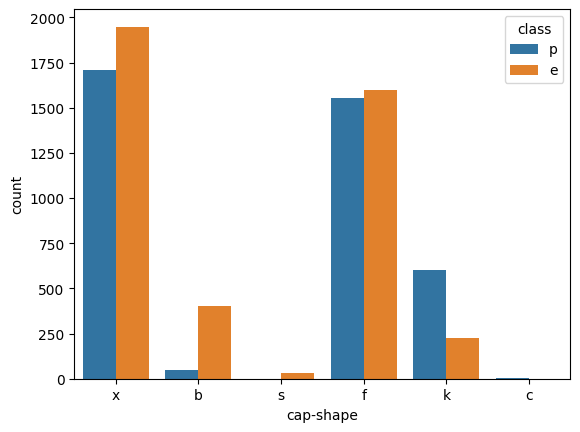

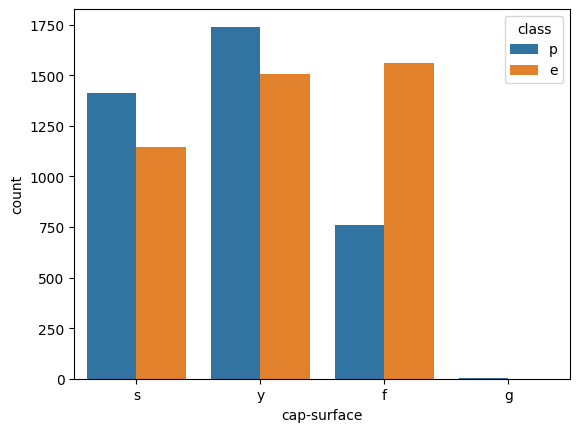

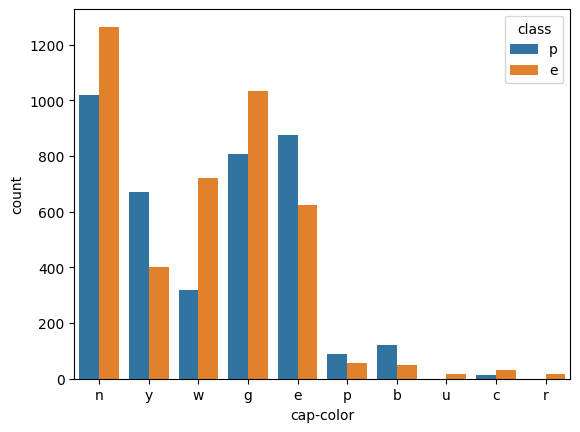

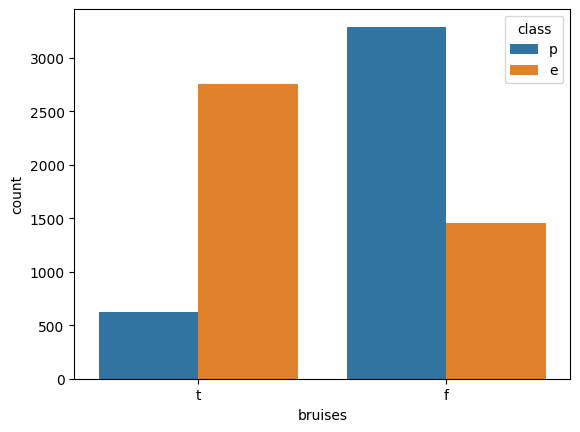

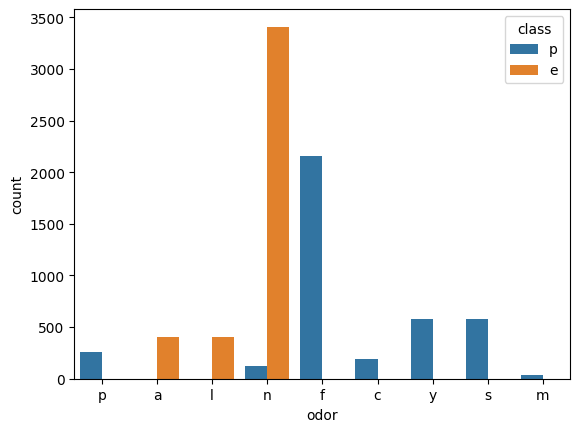

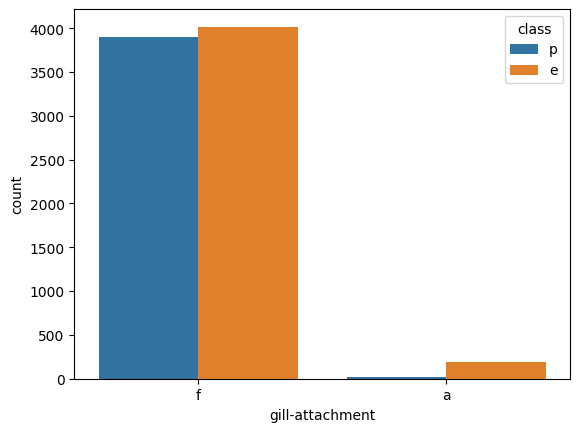

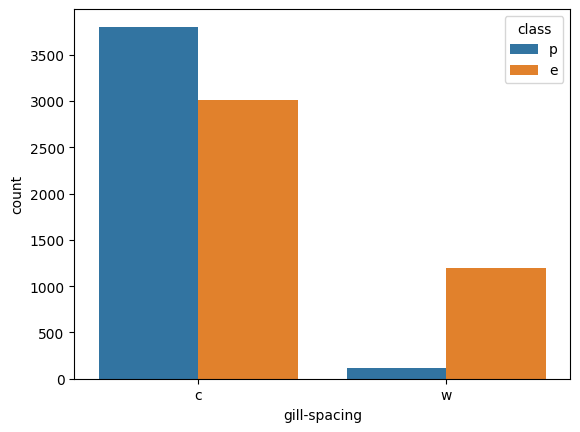

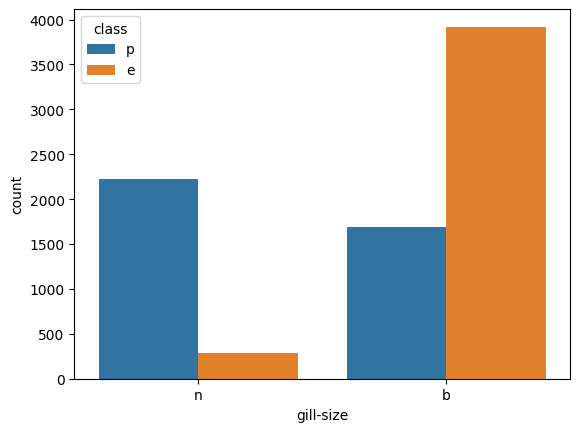

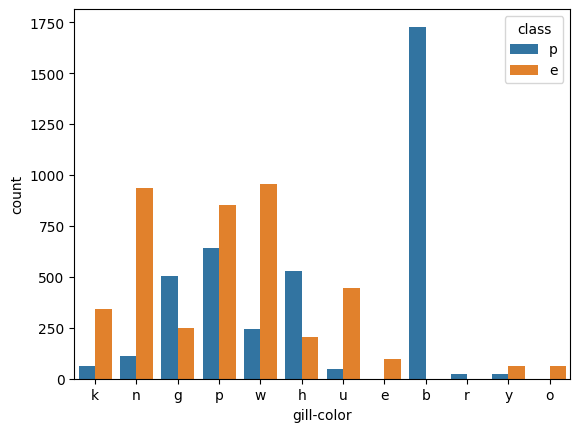

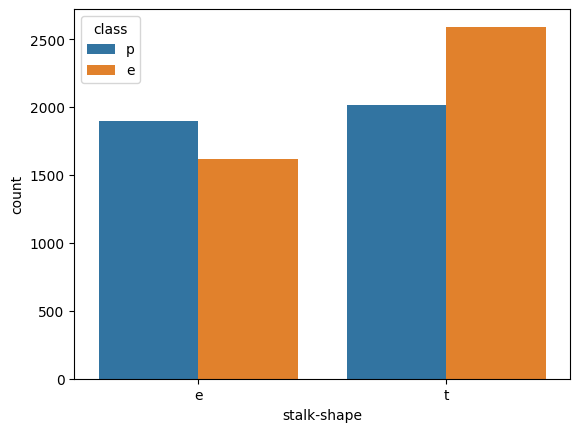

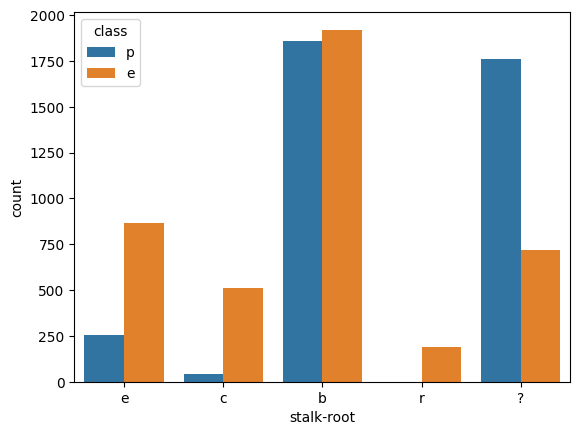

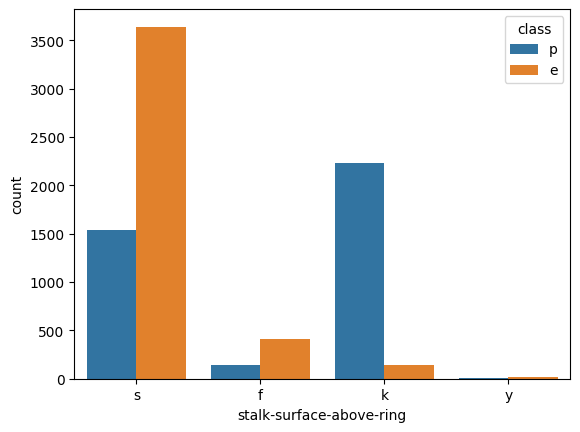

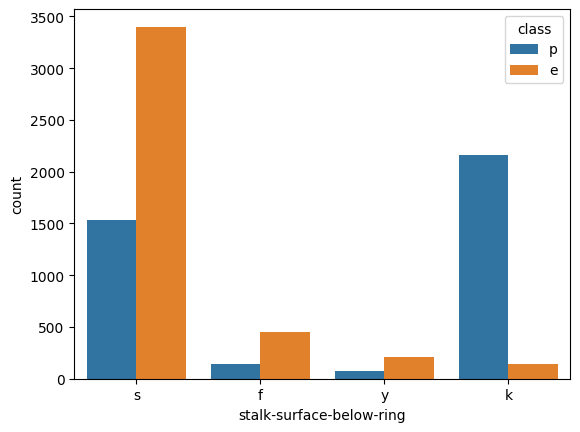

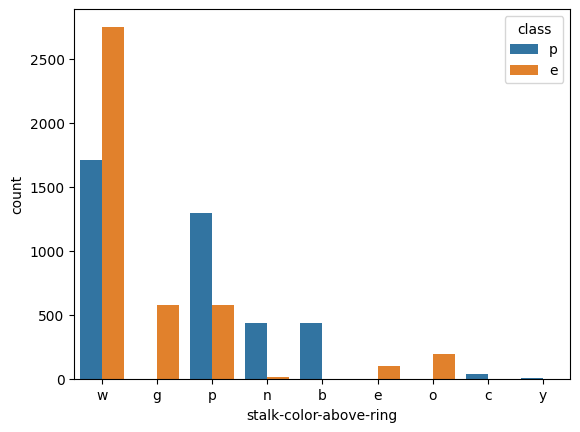

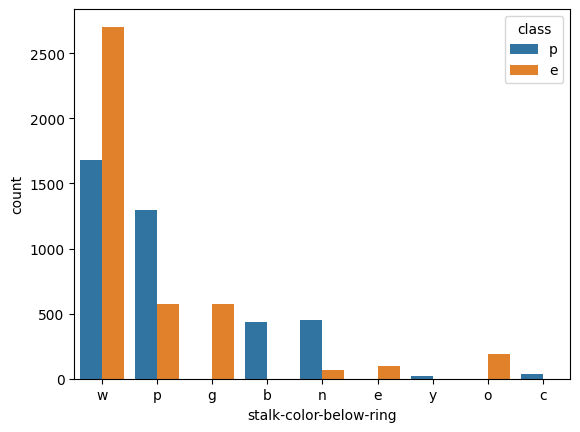

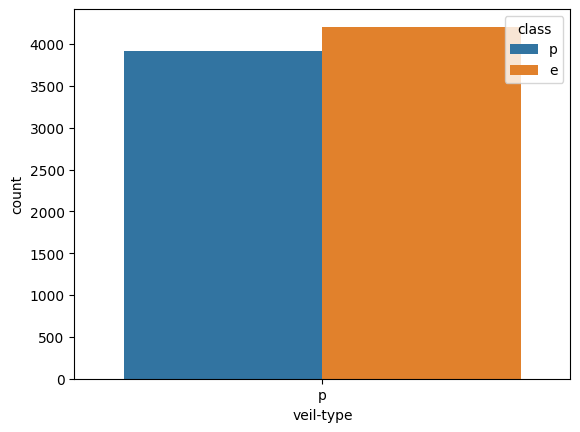

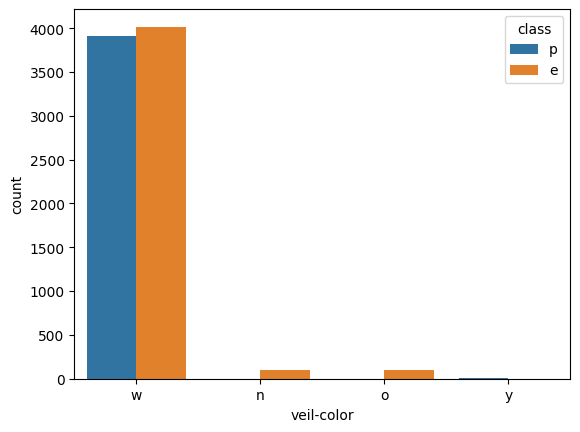

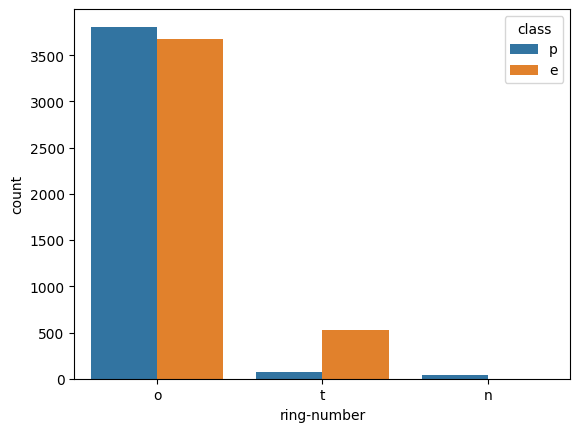

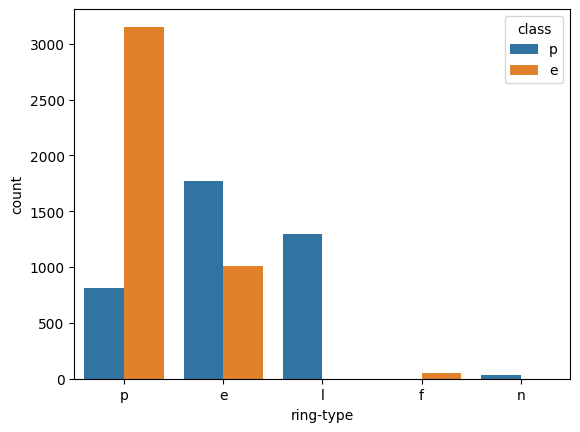

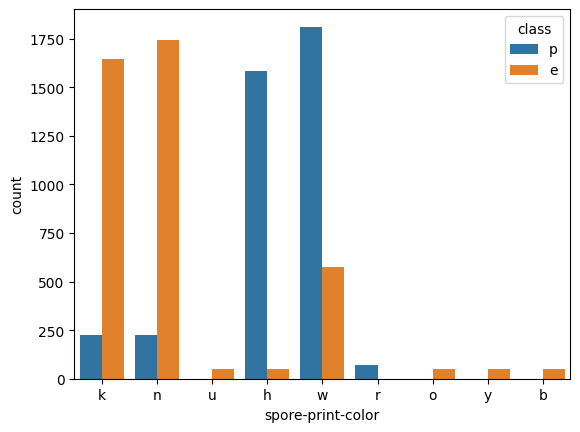

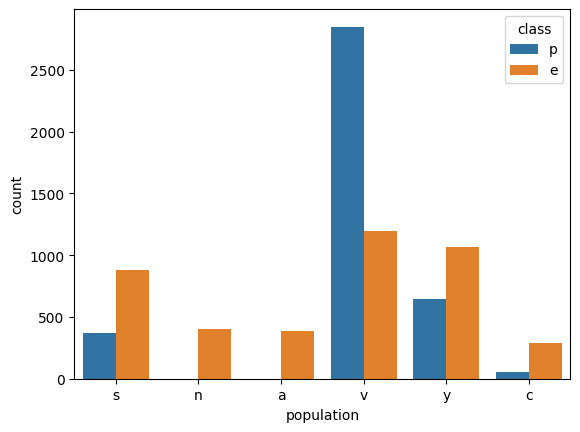

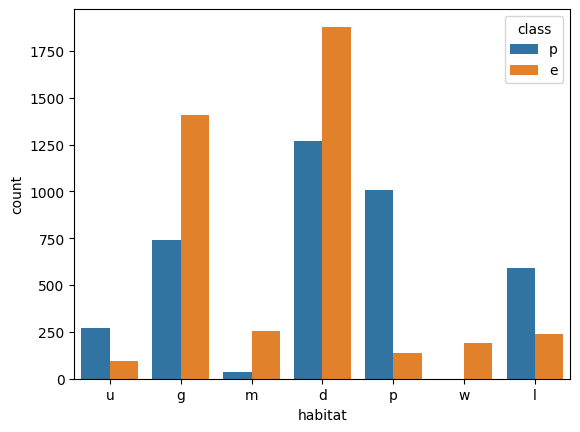

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns[1:]:
    sns.countplot(data=df,x=i,hue = df['class'],)
    plt.show()

In [7]:
dict([(12,14),(3,23)])

{12: 14, 3: 23}

In [97]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype=np.int8)

df_ord = pd.DataFrame(enc.fit_transform(df.drop('class',axis=1)),columns=df.columns[1:])
X_ord = df_ord
# y_ord = enc.transform(df['class'])
X_ord

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [98]:
class_cat = {'p':0,'e':1}
df_ord['class'] = df['class'].map(class_cat)

# Removing const Features

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ord.drop('class',axis=1), df_ord['class'], test_size=0.33, random_state=42)

In [24]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [25]:
# print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

1


['veil-type']

In [26]:
# we can then drop these columns from the train and test sets
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

## **2.1.2 Remove quasi-constant features** <a class="anchor" id="2.1.2"></a>

[Table of Contents](#0.1)

- Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to discriminate or predict a target. But there can be exceptions. So we should be careful when removing these type of features. Identifying and removing quasi-constant features, is an easy first step towards feature selection and more easily interpretable machine learning models.

- To identify quasi-constant features, we can once again use the VarianceThreshold function from sklearn.

- Here I will demonstrate how to identify quasi-constant features using the Santander Customer Satisfaction dataset.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ord.drop('class',axis=1), df_ord['class'], test_size=0.33, random_state=42)

In [34]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [30]:
df_ord.shape

(8124, 23)

In [32]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [35]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

1


['veil-type']

## **2.2 Univariate selection methods** <a class="anchor" id="2.2"></a>

[Table of Contents](#0.1)


- Univariate feature selection methods works by selecting the best features based on univariate statistical tests like ANOVA. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.

- The methods based on F-test estimate the degree of linear dependency between two random variables. They assume a linear relationship between the feature and the target. These methods also assume that the variables follow a Gaussian distribution.

- There are 4 methods that fall under this category :-

  1. SelectKBest
  2. SelectPercentile
  3. SelectFpr, SelectFdr, or family wise error SelectFwe
  4. GenericUnivariateSelection
  
Source : https://scikit-learn.org/stable/modules/feature_selection.html


- Here, I will limit the discussion to SelectKBest and SelectPercentile, because these two are most commonly used in practice.

In [111]:
X,y = df_ord.drop(columns=['class','veil-type']),df['class']

In [104]:
# now select features based on top 10 percentile
from sklearn.feature_selection import SelectPercentile, chi2

selector = SelectPercentile(chi2, percentile=90).fit(X, y)
X_new = selector.transform(X)
'new shape -> ' ,X_new.shape ,'original shape -> ', df.shape

('new shape -> ', (8124, 18), 'original shape -> ', (8124, 23))

In [102]:
np.array(X.columns[selector.get_support()])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 95 but corresponding boolean dimension is 21

In [121]:
j = ['odor', 'ring-type', 'stalk-surface-above-ring',   'stalk-surface-below-ring', 'gill-color', 'gill-size', 'bruises','spore-print-color', 'population', 'habitat']
g = ['odor', 'ring-type', 'stalk-surface-above-ring','stalk-surface-below-ring', 'gill-color', 'gill-size', 'bruises','spore-print-color', 'population', 'stalk-color-above-ring']
k = ['cap-color', 'odor', 'gill-spacing', 'gill-size', 'gill-color','stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','spore-print-color', 'population']

In [122]:
df1 = df_ord[list(X.columns[selector.get_support()])+['class']]
df2 = df_ord_mutual_cls.copy()
df3 = df_ord[list(chi2_selector.get_feature_names_out())+['class']]
df4 = df_ord[j+['class']]
df5 = df_ord[g+['class']]
df6 = df_ord[k+['class']]

In [106]:
X.columns[selector.get_support()]# X_new

Index(['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## **2.3 Information Gain** <a class="anchor" id="2.3"></a>

[Table of Contents](#0.1)


- **Information gain** or **mutual information** measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.


- In terms of  [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):


   - **Mutual information measures the information that X and Y share: It measures how much knowing one of these        variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does        not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if      X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X        is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual          information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X).            Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special          case of this is when X and Y are the same random variable.)**


In [110]:
from sklearn.feature_selection import mutual_info_classif
record = pd.DataFrame({'columns':X.columns,'mutual_info_class_f_score':mutual_info_classif(X, y)}).sort_values('mutual_info_class_f_score',ascending=False).head(15)
df_ord_mutual_cls = X[record['columns']]
df_ord_mutual_cls['class'] = y


/tmp/ipykernel_33/1945914681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord_mutual_cls['class'] = y


## **mutual_info_classif**


- It estimates mutual information for a discrete target variable.

- Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. 

- This function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

- It can be used for univariate features selection.

- Source : 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

In [112]:
# Compare Chi-Squared Statistics
# select two features with highest chi-squared statistics
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k=19)
X_kbest = chi2_selector.fit_transform(X, y)
X_kbest

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]], dtype=int8)

In [116]:
chi2_selector.get_feature_names_out()
# list(chi2_selector.get_feature_names_out())

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'], dtype=object)

## **2.6 Correlation-Matrix with Heatmap** <a class="anchor" id="2.6"></a>

[Table of Contents](#0.1)


- **Correlation** is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.

- **Good variables are highly correlated with the target**.

- Correlated predictor variables provide redundant information.

- **Variables should be correlated with the target but uncorrelated among themselves**.


- Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: 

   - "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".
   
   
- In this section,  I will demonstrate how to select features based on correlation between two features. We can find features that are correlated with each other. By identifying these features, we can then decide which features we want to keep, and which ones we want to remove.


- Using Pearson correlation our returned coefficient values will vary between -1 and 1.

- If the correlation between two features is 0 this means that changing any of these two features will not affect the other.

- If the correlation between two features is greater than 0 this means that increasing the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features).

- If the correlation between two features is less than 0 this means that increasing the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features).

- In this analysis we will check if the selected variables are highly correlated with each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

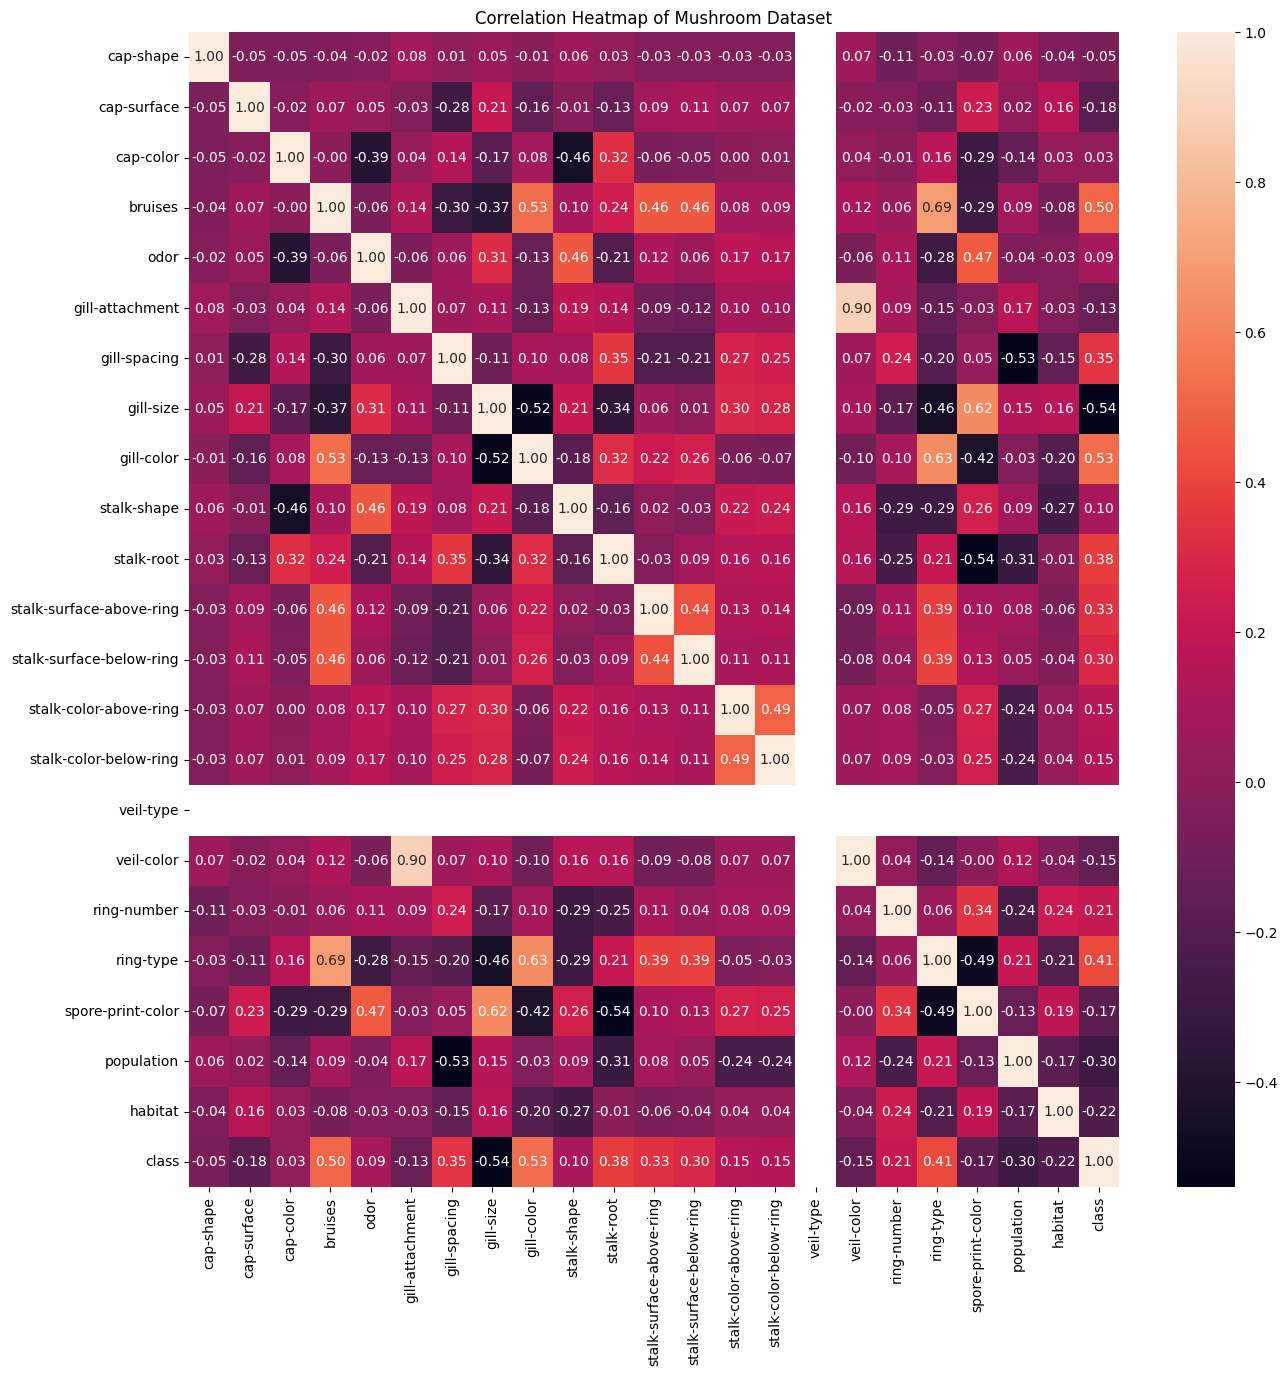

In [57]:
# Create correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Mushroom Dataset')
a = sns.heatmap(df_ord.corr(), annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show() 

# **3. Wrapper Methods** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


- In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from the subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

- Some common examples of wrapper methods are 

  - 1. Forward selection, 
  - 2. Backward elimination, 
  - 3. Exhaustive feature selection,
  - 4. Recursive feature elimination.
  - 5. Recursive feature elimination with cross-validation
  
  
- Wrapper methods can be explained with the help of following graphic:


![Wrapper Methods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png)



### Image source : AnalyticsVidhya

## **3.1 Forward Selection** <a class="anchor" id="3.1"></a>

[Table of Contents](#0.1) 


- Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

- The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

- Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

- The pre-set criteria can be the roc_auc for classification and the r squared for regression for example.

- This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

- There is a special package for python that implements this type of feature selection: mlxtend.

- In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

- I will demonstrate the Step Forward feature selection algorithm from mlxtend using the House Price dataset.


In [117]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_ord_mutual_cls.drop(labels=['class'], axis=1),
    df_ord_mutual_cls['class'],
    test_size=0.3,
    random_state=0)

In [63]:
X_train

,odor,ring-type,stalk-surface-above-ring,stalk-surface-below-ring,gill-color,gill-size,bruises,spore-print-color,population,stalk-color-above-ring,stalk-color-below-ring,habitat,stalk-root,gill-spacing,veil-color
5314,2,4,0,2,3,0,1,1,4,7,7,1,1,0,2
2075,3,4,2,2,4,0,1,2,2,7,7,3,2,0,2
5165,2,4,0,2,7,0,1,1,3,7,7,1,1,0,2
1155,0,4,2,2,4,0,1,3,3,7,7,3,2,0,2
4448,2,2,1,1,3,0,0,1,5,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,5,0,2,2,1,0,1,7,1,2,2,6,0,0,2
3264,2,2,1,1,3,0,0,1,5,6,4,4,1,0,2
1653,5,0,0,2,3,0,0,3,3,7,7,1,3,1,2
2607,5,4,2,2,5,0,1,3,4,3,3,0,1,0,2


In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

sfs1 = SFS(RandomForestClassifier(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)


[2024-02-15 17:48:32] Features: 1/10 -- score: 0.9870689168671469
[2024-02-15 17:48:41] Features: 2/10 -- score: 0.9990570319459855
[2024-02-15 17:48:49] Features: 3/10 -- score: 0.9999576412834982
[2024-02-15 17:48:57] Features: 4/10 -- score: 1.0
[2024-02-15 17:49:04] Features: 5/10 -- score: 1.0
[2024-02-15 17:49:11] Features: 6/10 -- score: 1.0
[2024-02-15 17:49:17] Features: 7/10 -- score: 1.0
[2024-02-15 17:49:23] Features: 8/10 -- score: 1.0
[2024-02-15 17:49:28] Features: 9/10 -- score: 1.0
[2024-02-15 17:49:33] Features: 10/10 -- score: 1.0

In [65]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['odor', 'ring-type', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'gill-color', 'gill-size', 'bruises',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

## **3.2 Backward Elimination** <a class="anchor" id="3.2"></a>

[Table of Contents](#0.1) 


- In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

- The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.


In [69]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

sfs2 = SFS(AdaBoostClassifier(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs2 = sfs2.fit(np.array(X_train), y_train)


[2024-02-15 17:53:52] Features: 14/10 -- score: 1.0
[2024-02-15 17:54:04] Features: 13/10 -- score: 1.0
[2024-02-15 17:54:15] Features: 12/10 -- score: 1.0
[2024-02-15 17:54:25] Features: 11/10 -- score: 1.0
[2024-02-15 17:54:34] Features: 10/10 -- score: 1.0

In [70]:
X_train.columns[list(sfs2.k_feature_idx_)]

Index(['odor', 'ring-type', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'gill-color', 'gill-size', 'bruises',
       'spore-print-color', 'population', 'stalk-color-above-ring'],
      dtype='object')

## **3.3 Exhaustive Feature Selection** <a class="anchor" id="3.3"></a>

[Table of Contents](#0.1) 


- In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all 15 feature combinations as follows:

  - all possible combinations of 1 feature
  - all possible combinations of 2 features
  - all possible combinations of 3 features
  - all the 4 features
  
  
and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.

- This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

- There is a special package for python that implements this type of feature selection: mlxtend.

- In the mlxtend implementation of the exhaustive feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

- This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features.

## **3.4 Recursive Feature Elimination with Cross-Validation** <a class="anchor" id="3.5"></a>

[Table of Contents](#0.1) 


- **Recursive Feature Elimination with Cross-Validated (RFECV)** feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination.

- Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.

- Please see my kernel - [Extensive Analysis - EDA + FE + Modelling : Section 19 Recursive FeaTure Elimination with Cross-Validation](https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling)

- Source : https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [71]:
X,y = df_ord.drop(columns=['class','veil-type']),df['class']

In [74]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = AdaBoostClassifier()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=10,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
#     n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 11


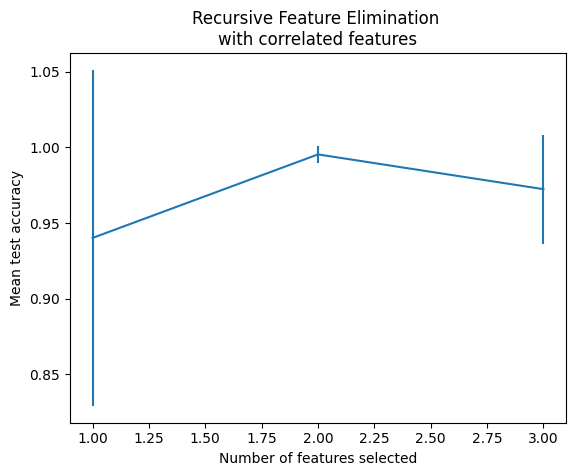

In [75]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [80]:
rfecv.get_feature_names_out()

array(['cap-color', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'spore-print-color', 'population'], dtype=object)

## **4.2 Random Forest Importance**<a class="anchor" id="4.2"></a>

[Table of Contents](#0.1)

- Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

- Random forests consist of 4-12 hundred decision trees, each of them built over a random extraction of the observations from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations, and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a sequence of yes-no questions based on a single or combination of features. At each node (this is at each question), the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves and different from the ones in the other bucket. Therefore, the importance of each feature is derived by how "pure" each of the buckets is.

- For classification, the measure of impurity is either the Gini impurity or the information gain/entropy. For regression the measure of impurity is variance. Therefore, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.

- To give a better intuition, features that are selected at the top of the trees are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.

- Please see my kernel, [Random Forest Classifier + Feature Importance - Section 13. Find important features with Random Forest model](https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance) to know how to find important features using the random forest model.

- I will demonstrate this process using the mushroom classification dataset as follows:-

In [85]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Encode categorical variables
X_1 = pd.get_dummies(X, prefix_sep='_')
y_1 = LabelEncoder().fit_transform(y)

In [87]:
# Normalize feature vector
X2 = StandardScaler().fit_transform(X_1)

In [88]:
# Split the dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X2, y_1, test_size = 0.30, random_state = 0)

In [90]:

# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the classifier to the training set
clf.fit(X_train_1, y_train_1)

RandomForestClassifier(random_state=0)

<Axes: >

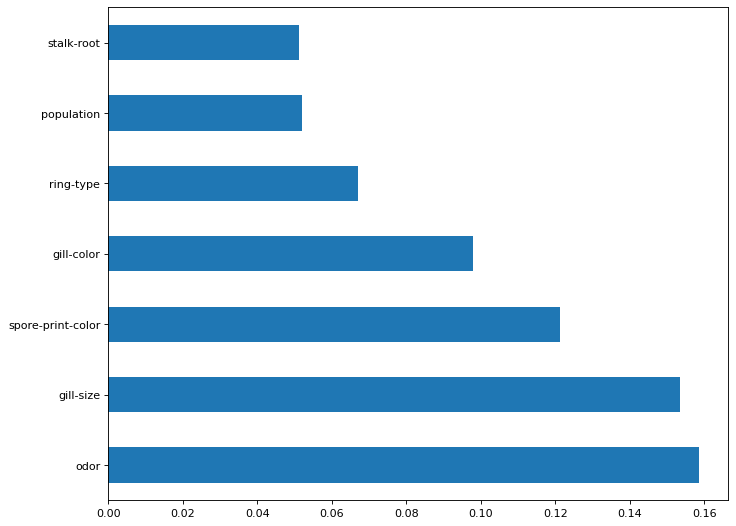

In [91]:
# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X_1.columns)

feat_importances.nlargest(7).plot(kind='barh')

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_ord)

In [21]:
df_ord

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,0
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,1
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,1
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,0
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,1
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,1
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,1
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,0


In [20]:
df_scaled[0]

array([ 1.02971224,  0.14012794, -0.19824983,  1.18591657,  0.88193766,
        0.16289645, -0.43886364,  1.49468272, -0.22899776, -1.14480575,
        1.78146019,  0.68377765,  0.58638466,  0.62244139,  0.63199138,
        0.        ,  0.14203663, -0.25613174,  0.94808086, -0.67019486,
       -0.5143892 ,  2.03002809, -1.0366127 ])

In [18]:
df_scaled.shape

(8124, 23)

In [19]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fin = sel.fit_transform(X_ord)
X_fin.shape

(8124, 18)

In [26]:
df_scaled[0,-1]

-1.036612696986993

In [29]:
df_ord['class']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [168]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=8, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
models = dict()
for i,j in  zip(classifiers,names):
    d = i.fit(X_train_3, y_train_3)
    score = d.score(X_test_3, y_test_3)
    
    models[j] = score

In [169]:
models

{'Nearest Neighbors': 0.9962700484893696,
 'Linear SVM': 0.9414397612831034,
 'RBF SVM': 0.9552405818724357,
 'Decision Tree': 0.97911227154047,
 'Random Forest': 0.9466616933979858,
 'Neural Net': 0.9257739649384558,
 'AdaBoost': 0.9981350242446848,
 'Naive Bayes': 0.8959343528534129,
 'QDA': 0.9884371503170459}

In [170]:
modelst = dict()
for i,j in  zip(classifiers,names):
#     d = i.fit(X_train_3, y_train_3)
    score = d.score(X_train_3, y_train_3)
    modelst[j] = score

In [171]:
modelst

{'Nearest Neighbors': 0.9884255006430277,
 'Linear SVM': 0.9884255006430277,
 'RBF SVM': 0.9884255006430277,
 'Decision Tree': 0.9884255006430277,
 'Random Forest': 0.9884255006430277,
 'Neural Net': 0.9884255006430277,
 'AdaBoost': 0.9884255006430277,
 'Naive Bayes': 0.9884255006430277,
 'QDA': 0.9884255006430277}

In [70]:
y

0        True
1       False
2       False
3        True
4       False
        ...  
8119    False
8120    False
8121    False
8122     True
8123    False
Name: class_p, Length: 8124, dtype: bool

In [119]:
df2.head()

,cap-surface,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,2,1,6,0,1,4,0,3,2,2,7,7,4,2,3,5
1,2,1,0,0,0,4,0,2,2,2,7,7,4,3,2,1
2,2,1,3,0,0,5,0,2,2,2,7,7,4,3,2,3
3,3,1,6,0,1,5,0,3,2,2,7,7,4,2,3,5
4,2,0,5,1,0,4,1,3,2,2,7,7,0,3,0,1


In [120]:
df1 = pd.DataFrame(df_ord['class'],columns=['class'])
df2 = pd.DataFrame(X_new3,columns=selected_features)
df3 = pd.concat((df1,df2),axis=1)
df3.head()

,class,cap-surface,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,0,2,1,6,0,1,4,0,3,2,2,7,7,4,2,3,5
1,1,2,1,0,0,0,4,0,2,2,2,7,7,4,3,2,1
2,1,2,1,3,0,0,5,0,2,2,2,7,7,4,3,2,3
3,0,3,1,6,0,1,5,0,3,2,2,7,7,4,2,3,5
4,1,2,0,5,1,0,4,1,3,2,2,7,7,0,3,0,1


In [133]:
df_3_final = df3.drop(columns=['gill-color','spore-print-color','bruises'])

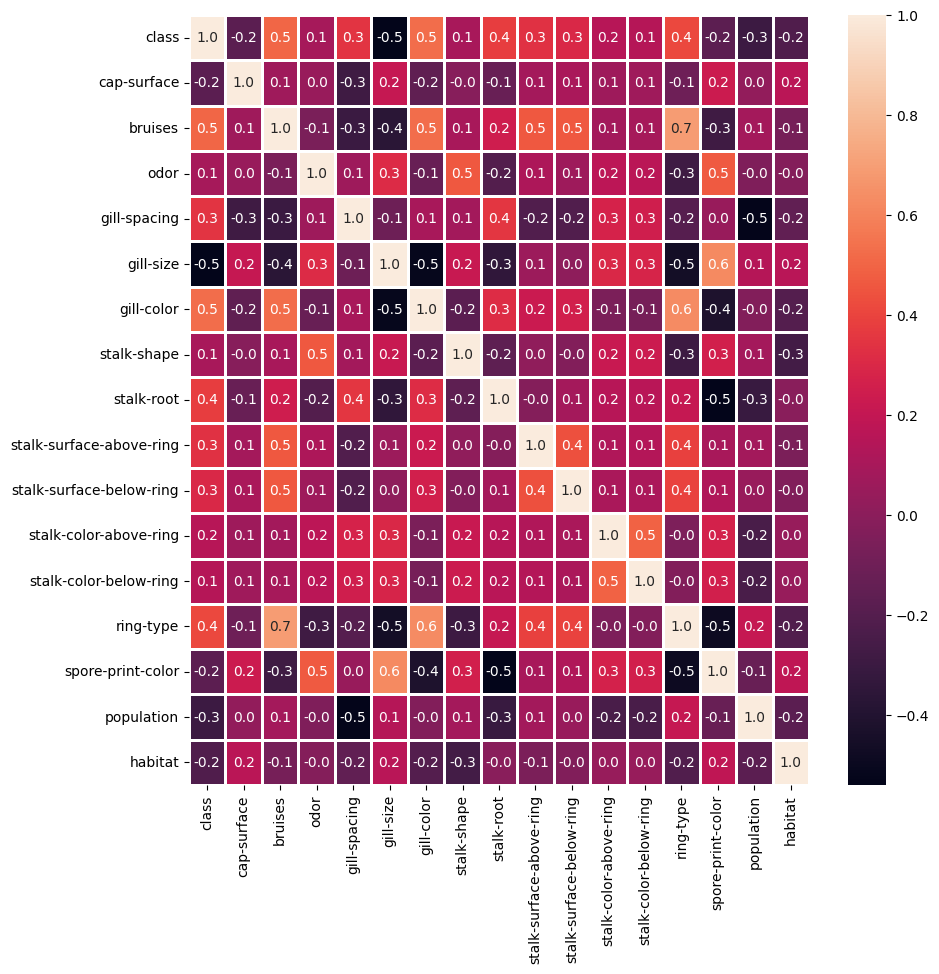

In [132]:
plt.figure(figsize=(10,10))
# ax = plt.subplot()
sns.heatmap(df3.corr(),annot=True,linewidths=1,fmt='.1f')

plt.show()

In [113]:
df_final.head()

,cap-surfaceclass,bruisesclass,odorclass,gill-spacingclass,gill-sizeclass,gill-colorclass,stalk-shapeclass,stalk-rootclass,stalk-surface-above-ringclass,stalk-surface-below-ringclass,stalk-color-above-ringclass,stalk-color-below-ringclass,ring-typeclass,spore-print-colorclass,populationclass,habitatclass
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
pd.DataFrame()

array([[2, 1, 6, ..., 2, 3, 5],
       [2, 1, 0, ..., 3, 2, 1],
       [2, 1, 3, ..., 3, 2, 3],
       ...,
       [2, 0, 5, ..., 0, 1, 2],
       [3, 0, 8, ..., 7, 4, 2],
       [2, 0, 5, ..., 4, 1, 2]], dtype=int8)

In [167]:
from sklearn.model_selection import train_test_split

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_new3, df_ord['class'], test_size=0.33, random_state=42)

In [144]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# j=0
# for i in X_new3.T:
#     plt.xlabel(selected_features[j])
#     sns.countplot(data=pd.DataFrame(X_new3,columns=selected_features),x=i,hue = df['class'],)
#     j+=1
#     plt.show()

In [78]:
X_new3.get_support()

AttributeError: 'numpy.ndarray' object has no attribute 'get_support'

In [166]:
from sklearn.feature_selection import SelectPercentile, chi2,f_classif,mutual_info_classif
selector = SelectPercentile(chi2, percentile=90)
selector.fit(df_ord.drop('class',axis=1), df_ord['class'])
X_new3 = selector.transform(df_ord.drop('class',axis=1))
mask = selector.get_support()
selected_features = df_ord.drop('class',axis=1).columns[mask]
print(selected_features)
# X_new3.shape


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [80]:
X_new4 = SelectPercentile(f_classif, percentile=95).fit_transform(df_ord.drop('class',axis=1), df_ord['class'])
print(X_new4.shape)
X_new5 = SelectPercentile(mutual_info_classif, percentile=95).fit_transform(df_ord.drop('class',axis=1), df_ord['class'])
print(X_new5.shape)

selector = SelectPercentile(f_classif, percentile=95)
selector.fit(df_ord.drop('class',axis=1), df_ord['class'])
mask = selector.get_support()
selected_features = df_ord.drop('class',axis=1).columns[mask]
print(selected_features)

selector = SelectPercentile(mutual_info_classif, percentile=95)
selector.fit(df_ord.drop('class',axis=1), df_ord['class'])
mask = selector.get_support()
selected_features = df_ord.drop('class',axis=1).columns[mask]
print(selected_features)

(8124, 20)
(8124, 20)
Index(['cap-shape', 'cap-surface', 'bruises', 'odor', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')


In [47]:
X_new3 == X_new4

array([[ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True]])

In [54]:
X_new3[0]==X_new4[0]

array([ True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [50]:
X_new4[0]

array([5, 2, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5],
      dtype=int8)

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
X_new3

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]], dtype=int8)

In [55]:
X_new3.T

array([[5, 5, 0, ..., 2, 3, 5],
       [2, 2, 2, ..., 2, 3, 2],
       [4, 9, 8, ..., 4, 4, 4],
       ...,
       [2, 3, 3, ..., 0, 7, 4],
       [3, 2, 2, ..., 1, 4, 1],
       [5, 1, 3, ..., 2, 2, 2]], dtype=int8)